## SEC Serialization
public key(S256Point) 是椭圆曲线上的一个点，序列化的标准为SEC（Standard for Efficient Cryptography），SEC有两种格式：压缩和非压缩。
### Uncompressed
1. prefix 0x04
2. x轴，32字节，大端
3. y轴，32字节，大端
### Compressed
1. prefix 0x02(y为偶数)|0x03(y为奇数)
2. x轴，32字节，大端
对于给定的x，满足y和p-y在椭圆曲线上。p是一个大于2的质数，所以p是奇数，所以y和p-y一奇一偶。
## DER Signatures
1. prefix 0x30
2. length of rest
3. 0x02
4. r的长度，r, 大端，如果第一个字节大于0x80，则添加前缀0x00
5. 0x02
6. s的长度，s，大端，如果第一个字节大于0x80，则添加前缀0x00

0x30|长度|0x02|r的长度|0x00（如果r的第一个字节大于0x80）+r|0x02|s的长度|0x00（如果s的第一个字节大约0x80）|s

## Address
1. prefix 0x00(mainnet), 0x6f(testnet)
2. hash160(SEC)
3. #1+#2
4. hash160(#3) 取前4个字节
5. base58（#3+4）
## WIF Format
1. prefix 0x80(mainnet), 0xef(testnet)
2. secret key 大端存储
3. 如果pub key 的SEC是compressed，添加后缀0x01
4. #1|#2|#3
5. encode_base58_checksum(#4)

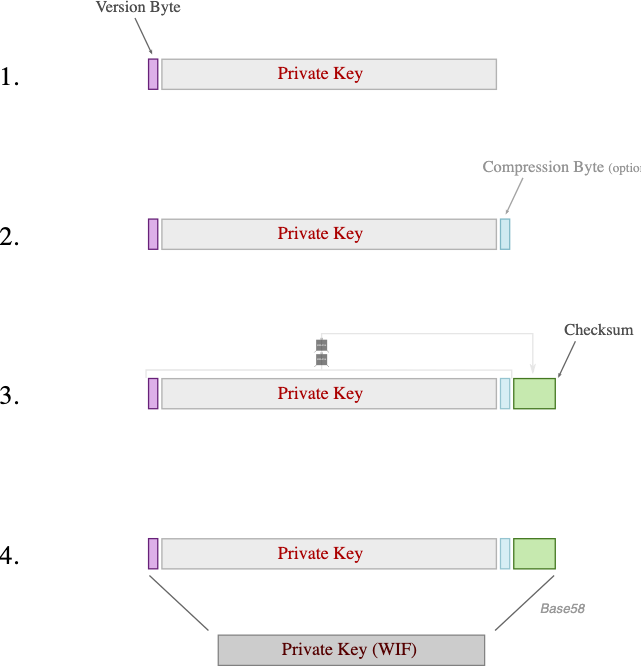


## 助记词生成地址
initial entropy->mnemonic phrases->seed->private key-> address
initial entropy: 随机源生成，最少128bit
mnemonic phrases-------(PBKDF2)>seed
PBKDF2的五个参数：
- pseudorandom function (1)
- password (mnemonic phrases)
- salt (mnemonic+用户设置的parsephrase)
- a number of iterations
- a key length
seed -> private key
PBKDF2("0x77cd...a879", "Bitcoin seed")

### HD Wallet

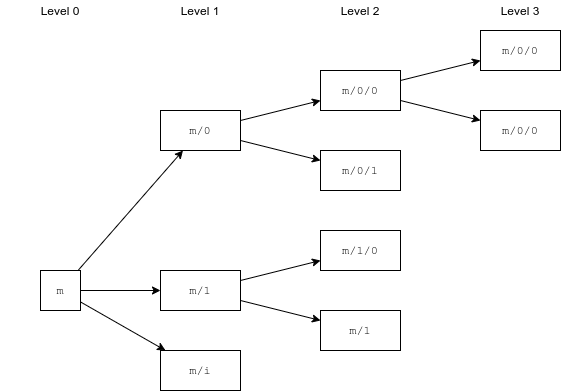

每一个key可以衍生成2³² 个child key。其中包含2³¹个normal key和2³¹个harden key。normal key使用public key 衍生出来的，harden key使用private key衍生出来的。

地址衍生：

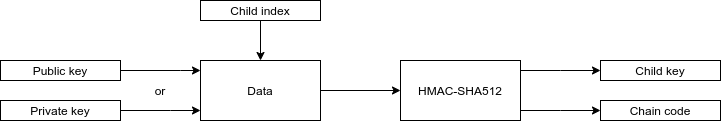

1. 如果child key是privatekey，则使用0x00+privatekey作为data，如果是publickey则直接使用33bytes的publickey作为data.
2. HMAC-SHA512(key,index,chain_code) ->64bytes
3. 前32个bytes作为衍生key，后32bytes作为chain code.

如何计算新key：
kᵢ = point(Iₗ) + Kₚₐᵣ

扩展公钥有82字节：
- version（4个字节）
- depth（1字节）
- The parent fingerprint（4个字节）
  RIPEMD160(sha256(key))
- The index(4个字节)
- The chain code（32个字节）
- The public or private key（33字节）
- The checksum（4个字节）
  sha256(sha256(other bytes))
  
## Multi-Account Hierarchy for Deterministic Wallets
m / purpose' / coin_type' / account' / change / address_index


## 示例
128 bit entropy:
11111011 00010101 11111100 00011110 01000100 00011011 10110100 00110001 01000000 01111010 01010111 11101011 10000111 11111010 00011111 11011110
将sha256(entropy)的前len(entropy)/32 bit追加到entrypy后面，然后11位切割，映射成word.


